# Parte 2 da 2ª Atividade da N1

## Questão 1

Com os dados abaixo(X e Y), implemente um modelo de regressão polinomial que melhor se ajuste aos dados, usar MSE e R²?
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14].
Y = [8, 9, 2, 23, 34, 12, 13, 17, 16, 20, 41, 34, 35, 66, 70]

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'y')

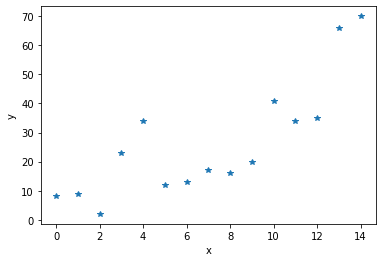

In [14]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
y = np.array([8, 9, 2, 23, 34, 12, 13, 17, 16, 20, 41, 34, 35, 66, 70])

plt.plot(x, y, '*')
plt.xlabel('x')
plt.ylabel('y')

In [24]:
# Correlação
np.corrcoef(x,y)

array([[1.        , 0.80828187],
       [0.80828187, 1.        ]])

In [7]:
# Treinamento do modelo de regressão polinomial, no caso achar o coeficiente de regressão
coef = np.polyfit(x, y, 5) # Usando o grau (degree) 5
coef

array([-2.04959514e-03,  6.89573906e-02, -7.25090795e-01,  2.53291210e+00,
        7.62654799e-01,  6.27979876e+00])

In [8]:
# Predição (validação do modelo)
y_predic = np.polyval(coef,x)

# O objetivo é que os dados de resultado predizidos sejam o mais proximo possivel de y
y_predic

array([ 6.27979876,  8.91718266, 13.17376161, 16.87401762, 19.00550726,
       19.47291022, 18.85207788, 18.14408192, 18.52926292, 21.12127888,
       26.72115385, 35.57132651, 47.10969874, 59.72368421, 70.50425697])

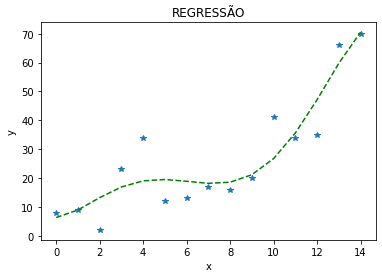

In [15]:
plt.plot(x,y,'*')
plt.plot(x, y_predic, 'g--', label = 'Predição')
plt.xlabel('x')
plt.ylabel('y')
plt.title('REGRESSÃO')
plt.show()

In [18]:
# Medições dos scores - Quanto mais proximo de zero, melhor

# R2
r2_score = r2_score(y, y_predic)
r2_score

0.8464512475471241

In [21]:
# Mean square error (erro quadratico medio)

mse = mean_squared_error(y,y_predic)
np.sqrt(mse)

7.6676013991962755

# Questão 2 
Faça o calculo das distancias de "chebyshev", "manhatta" e "euclidana" dos objetos A(1, 3, 4, 5, 10) e B(2, 11, 8, 9, 15)?

In [25]:
a = np.array([1, 3, 4, 5, 10])
b = np.array([2, 11, 8, 9, 15])

### Chebyshev

In [34]:
distance_list = []

for index in range(len(a)):
    distance_list.append(abs(a[index] - b[index]))

distance_list

[1, 8, 4, 4, 5]

In [35]:
max(distance_list)

8

### Manhatta

In [36]:
np.array(distance_list).sum()

22

### Euclidana

In [37]:
for index in range(len(distance_list)):
    distance_list[index] = distance_list[index] ** 2

distance_list

[1, 64, 16, 16, 25]

In [40]:
euclidiana_list = np.array(distance_list).sum()
euclidiana_list

122

In [43]:
euclidiana_list ** (1/2)

11.045361017187261

# Questão 3
Usando a função  "linspace"  do numpy gere  500 dados igualmente espaçados de 0 a 10. 
Depois deixe os dados organizados usando o K-fold com K=5 e Hold-Out com 80% para treinamento e 
20% para testes.

In [44]:
data = np.linspace(0, 10, num=500)
data

array([ 0.        ,  0.02004008,  0.04008016,  0.06012024,  0.08016032,
        0.1002004 ,  0.12024048,  0.14028056,  0.16032064,  0.18036072,
        0.2004008 ,  0.22044088,  0.24048096,  0.26052104,  0.28056112,
        0.3006012 ,  0.32064128,  0.34068136,  0.36072144,  0.38076152,
        0.4008016 ,  0.42084168,  0.44088176,  0.46092184,  0.48096192,
        0.501002  ,  0.52104208,  0.54108216,  0.56112224,  0.58116232,
        0.6012024 ,  0.62124248,  0.64128257,  0.66132265,  0.68136273,
        0.70140281,  0.72144289,  0.74148297,  0.76152305,  0.78156313,
        0.80160321,  0.82164329,  0.84168337,  0.86172345,  0.88176353,
        0.90180361,  0.92184369,  0.94188377,  0.96192385,  0.98196393,
        1.00200401,  1.02204409,  1.04208417,  1.06212425,  1.08216433,
        1.10220441,  1.12224449,  1.14228457,  1.16232465,  1.18236473,
        1.20240481,  1.22244489,  1.24248497,  1.26252505,  1.28256513,
        1.30260521,  1.32264529,  1.34268537,  1.36272545,  1.38

### K-fold

In [49]:
cv = KFold(n_splits=5)
cv

KFold(n_splits=5, random_state=None, shuffle=False)

### Hold-Out

In [52]:
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 0)

In [53]:
data_train

array([ 2.14428858,  6.73346693,  1.42284569,  9.498998  ,  0.12024048,
        8.25651303,  2.26452906,  4.72945892,  5.99198397,  3.10621242,
        5.4509018 ,  0.14028056,  2.74549098,  0.16032064,  9.27855711,
        8.65731463,  7.51503006,  5.69138277,  4.20841683,  3.76753507,
        8.61723447,  0.98196393,  2.68537074,  7.31462926,  8.27655311,
        4.78957916,  1.18236473,  8.13627255,  7.83567134,  8.23647295,
        9.71943888,  4.58917836,  5.95190381,  1.10220441,  5.87174349,
        9.81963928,  9.17835671,  9.15831663,  9.07815631,  3.72745491,
        3.88777555,  1.04208417,  1.48296593,  0.52104208,  9.77955912,
        0.08016032,  6.37274549,  6.63326653,  4.90981964,  0.1002004 ,
        2.8256513 ,  7.6753507 ,  2.70541082,  9.87975952,  2.44488978,
        0.44088176,  1.36272545,  0.4008016 ,  7.65531062,  0.28056112,
        5.57114228,  4.50901804,  1.28256513,  7.63527054,  4.62925852,
        1.62324649,  8.03607214,  6.05210421, 10.        ,  9.43

In [54]:
data_test

array([1.80360721, 5.09018036, 5.67134269, 8.91783567, 9.23847695,
       0.3006012 , 6.33266533, 9.7995992 , 3.18637275, 3.06613226,
       4.82965932, 5.01002004, 7.81563126, 5.79158317, 3.42685371,
       6.59318637, 9.37875752, 7.11422846, 3.08617234, 0.74148297,
       4.10821643, 7.33466934, 4.80961924, 2.16432866, 0.90180361,
       8.77755511, 0.42084168, 7.35470942, 1.9238477 , 4.66933868,
       8.57715431, 2.36472946, 2.48496994, 3.82765531, 7.49498998,
       9.85971944, 6.23246493, 9.03807615, 7.0741483 , 4.76953908,
       6.45290581, 0.92184369, 8.0761523 , 4.42885772, 1.52304609,
       0.02004008, 4.26853707, 6.51302605, 8.37675351, 2.04408818,
       7.2745491 , 3.40681363, 6.87374749, 2.88577154, 2.64529058,
       0.24048096, 6.55310621, 3.46693387, 4.48897796, 6.85370741,
       1.56312625, 5.53106212, 7.75551102, 8.51703407, 6.03206413,
       3.92785571, 0.2004008 , 9.3987976 , 5.43086172, 1.50300601,
       2.84569138, 1.30260521, 6.81362725, 9.6993988 , 3.50701